透射光譜
1.計算通量光譜的大小(從光源開始)
2.長度設定1微米 光子晶體週期1微米
3.整體結構由一塊波導加上2N個孔組合而成

In [1]:
import meep as mp
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Video

resolution = 20  # 解析度

eps = 13 #介電系數
w = 1.2  #波導厚度
r = 0.36 #控的半徑 
d = 1.4  #缺陷(孔)的間距 (正常設定為1)
N = 3    #缺陷兩側的孔數

sy = 6   # y方向的大小
pad = 2  # 最後的孔和pml的距離
dpml = 1 # PML 厚度

sx = 2 * (pad + dpml + N) + d - 1 # x方向大小 
cell = mp.Vector3(sx, sy, 0)

fcen = 0.25
df = 0.2

In [2]:
blk = mp.Block(size=mp.Vector3(mp.inf, w, mp.inf), material=mp.Medium(epsilon=eps))
geometry = [blk]

for i in range(N):
    geometry.append(mp.Cylinder(r, center=mp.Vector3(d / 2 + i)))
    geometry.append(mp.Cylinder(r, center=mp.Vector3(-(d / 2 + i))))

pml_layers = [mp.PML(1.0)]

In [3]:
def sim_cavity(N=3, sy=6, fcen=0.25, df=0.2):
    sx = 2 * (pad + dpml + N) + d - 1  # size of cell in x direction
    cell = mp.Vector3(sx, sy, 0)
    blk = mp.Block(size=mp.Vector3(mp.inf, w, mp.inf), material=mp.Medium(epsilon=eps))
    geometry = [blk]

    for i in range(N):
        geometry.append(mp.Cylinder(r, center=mp.Vector3(d / 2 + i)))
        geometry.append(mp.Cylinder(r, center=mp.Vector3(-(d / 2 + i))))

    src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Hz, mp.Vector3(0))]

    sym = [mp.Mirror(mp.Y, phase=-1), mp.Mirror(mp.X, phase=-1)]

    sim = mp.Simulation(
        cell_size=cell,
        geometry=geometry,
        boundary_layers=pml_layers,
        sources=src,
        symmetries=sym,
        resolution=resolution,
    )

    return sim

     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (2.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-2.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant eps

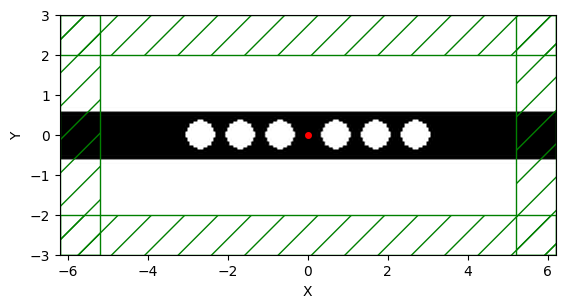

In [5]:
sim = sim_cavity()
f = plt.figure(dpi=100)
sim.plot2D(ax=f.gca())
plt.show()

In [6]:
h = mp.Harminv(mp.Hz, mp.Vector3(), fcen, df)
sim.run(mp.after_sources(h), until_after_sources=400)

f = plt.figure(dpi=150)
animate = mp.Animate2D(sim, f=f, fields=mp.Hz, realtime=False, normalize=True)

sim.run(mp.at_every(1 / fcen / 20, animate), until=1 / fcen)
plt.close()

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00300694 s
Working in 2D dimensions.
Computational cell is 12.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylin

In [7]:
f = [m.freq for m in h.modes]
Q = [m.Q for m in h.modes]

for fiter, qiter in zip(f, Q):
    print(f"Resonant frequency: {fiter}, Q: {qiter}")

Resonant frequency: 0.23445415346006226, Q: 372.4080823393137


In [8]:
N_vec = np.arange(2, 16, 2)
f = []
Q = []
for N in N_vec:
    sim = sim_cavity(N=N)
    h = mp.Harminv(mp.Hz, mp.Vector3(), fcen, df)
    sim.run(mp.after_sources(h), until_after_sources=400)
    f.append([m.freq for m in h.modes])
    Q.append([m.Q for m in h.modes])

-----------
Initializing structure...
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00320792 s
Working in 2D dimensions.
Computational cell is 10.4 x 6 x 0 with resolution 20
     block, center = (0,0,0)
          size (1e+20,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (13,13,13)
     cylinder, center = (0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-0.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
     cylinder, center = (-1.7,0,0)
          radius 0.36, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (1,1,1)
time for s

In [9]:
for fiter, qiter in zip(f, Q):
    print(f"Resonant frequency: {fiter}, Q: {qiter}")

Resonant frequency: [0.23402785591609798], Q: [62.46025708532573]
Resonant frequency: [0.23453222951306762, 0.32033807613416204], Q: [1604.356473866453, 56.98389670210004]
Resonant frequency: [0.23454147743770024, 0.3258852411380472], Q: [5748.043224349755, 87.97770233096661]
Resonant frequency: [0.19490450358949374, 0.23454251749223734, 0.32539234438643855], Q: [137.00619540273513, 6014.975744028332, 56.580942983844764]
Resonant frequency: [0.19646726004730083, 0.2345423761255255, 0.324769946592927], Q: [693.9626518724795, 6082.426436087426, 171.66619330013137]
Resonant frequency: [0.1685558006926463, 0.23454232067771297, 0.3253002572176196], Q: [257.80583902154433, 6099.601982617609, 220.11850907267544]
Resonant frequency: [0.17864773754550423, 0.2345423570840738, 0.30955350022192535, 0.32515081796398976], Q: [205.62440634884717, 6081.525821269285, -9027.938244067873, 212.0343830304439]


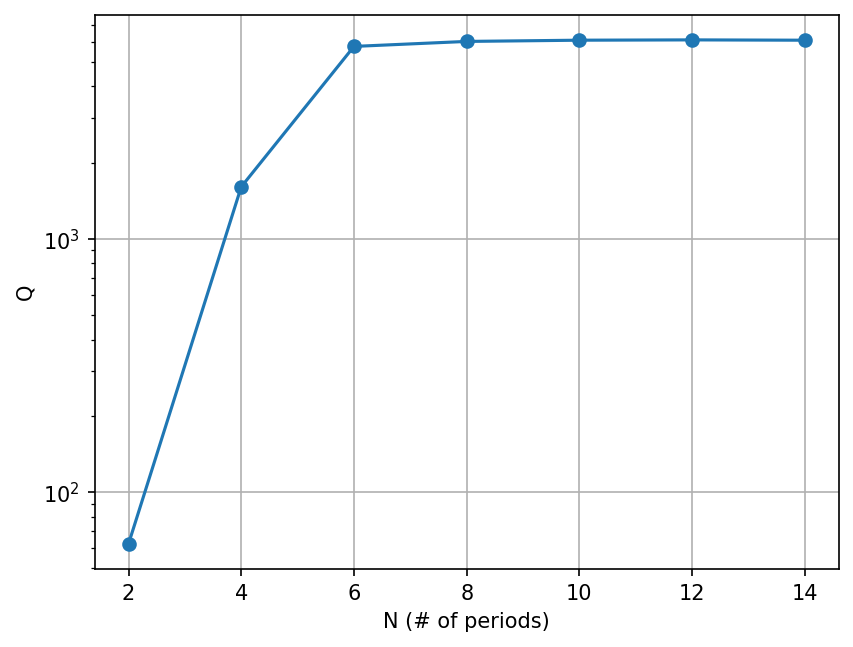

In [10]:
idx = np.zeros(N_vec.shape)
Q_fund = np.zeros(N_vec.shape)
for i in range(N_vec.size):
    idx[i] = np.abs(np.array(f[i]) - 0.234).argmin()
    Q_fund[i] = Q[i][int(idx[i])]

plt.figure(dpi=150)
plt.semilogy(N_vec, Q_fund, "o-")
plt.grid(True)
plt.xlabel("N (# of periods)")
plt.ylabel("Q")
plt.show()